<a href="https://colab.research.google.com/github/quoctrungsz27/Term-Midle-Test/blob/main/VN_Food_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [41]:

folder = '/content/drive/MyDrive/Colab Notebooks/Food Data/Data_Food_VN/'

img_size = 100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('BanhCuon'):
    output = 1.0
  if file.startswith('BanhGio'):
    output = 2.0
  if file.startswith('BanhMi'):
    output = 3.0
  if file.startswith('BanhPia'):
    output = 4.0
  if file.startswith('BunBoHue'):
    output = 5.0
  if file.startswith('BunRieu'):
    output = 6.0
  if file.startswith('CaKhoTo'):
    output = 7.0
  if file.startswith('ChaoLong'):
    output = 8.0
  if file.startswith('ComTam'):
    output = 9.0
  if file.startswith('NemChua'):
    output = 10.0
  
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)

(1553, 100, 100, 3) (1553,)


In [42]:
photos = photos.astype('float32')/255.0

print(photos.shape)

(1553, 100, 100, 3)


In [43]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.20, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.25, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(931, 100, 100, 3)
(931,)
(311, 100, 100, 3)
(311,)
(311, 100, 100, 3)
(311,)


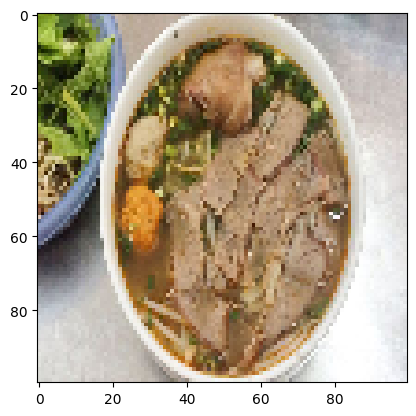

Mon này là:  5.0


In [44]:
image_test=27
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Mon này là: ', trainY[image_test])


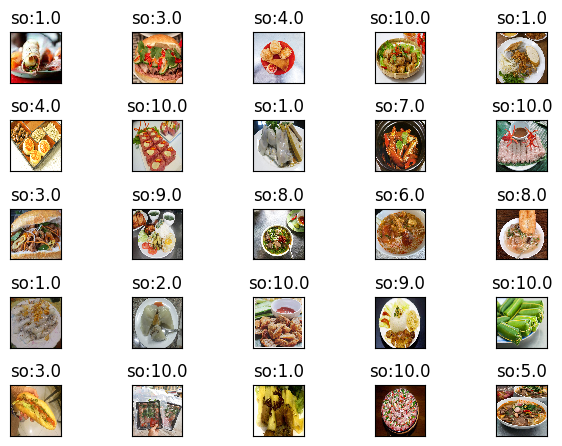

In [37]:

for i in range(25):  # 30 hình ảnh
  plt.subplot(5,5,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])
  

In [45]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)


(931, 11)
(311, 11)
(311, 11)


In [62]:

batch_size=32
epochs = 50
classes = 11

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'tanh', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))




# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'tanh'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     



model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()
  

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                

In [63]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=50,verbose = 1, validation_data=(valX, valY))
print(time()-start)


Epoch 1/50
30/30 [==============================] - 1s 28ms/step - loss: 2.2121 - accuracy: 0.2073 - val_loss: 1.9824 - val_accuracy: 0.2862
Epoch 2/50
30/30 [==============================] - 1s 22ms/step - loss: 1.8679 - accuracy: 0.3212 - val_loss: 2.0486 - val_accuracy: 0.2251
Epoch 3/50
30/30 [==============================] - 1s 22ms/step - loss: 1.6479 - accuracy: 0.4533 - val_loss: 1.6714 - val_accuracy: 0.4502
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 1.3540 - accuracy: 0.5371 - val_loss: 1.6456 - val_accuracy: 0.4309
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 1.0708 - accuracy: 0.6649 - val_loss: 1.6671 - val_accuracy: 0.4566
Epoch 6/50
30/30 [==============================] - 1s 20ms/step - loss: 0.7901 - accuracy: 0.7766 - val_loss: 1.6093 - val_accuracy: 0.4630
Epoch 7/50
30/30 [==============================] - 1s 24ms/step - loss: 0.6659 - accuracy: 0.8045 - val_loss: 1.5685 - val_accuracy: 0.5145
Epoch 8/50
30

In [64]:
model.save('/content/drive/MyDrive/Colab Notebooks/Food Data/Food Model/Food_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Money data/Money Model/Money_model.h5')

Text(0.5, 0, 'Epoch')

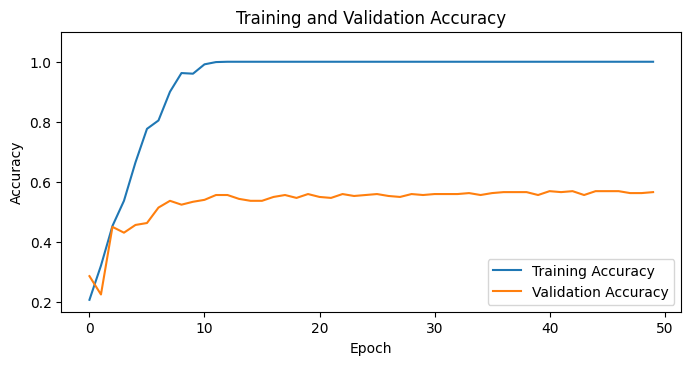

In [65]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')


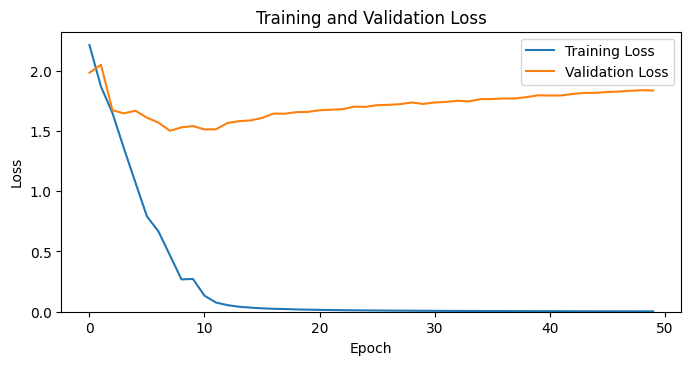

In [66]:

acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
     

1/1 [==============================] - 0s 74ms/step
Predicted:  BanhGio


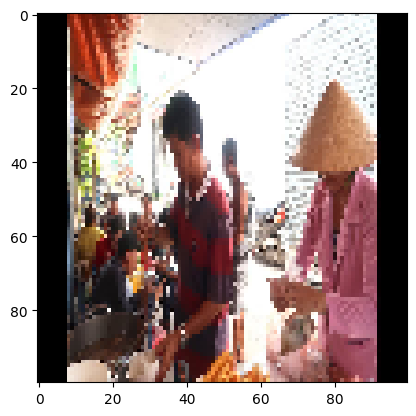

In [67]:
name= {1:'BanhCuon', 2:'BanhGio',3:'BanhMi',4:'BanhPia',5:'BunBoHue',6:'BunRieu',7:'CaKhoTo',8:'ChaoLong',9:'ComTam',10:'NemChua'}  
#test
filePath = '/content/drive/MyDrive/Colab Notebooks/Food Data/Data_Food_VN/BanhGio (27).jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)


In [68]:


# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=100, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")


4/4 [==============================] - 0s 6ms/step
Accuracy: 51.0 %
